<div><font size="4"><center><b>Dataset: ds2</b></center></font></div>

In [9]:
import pandas as pd
from scipy import stats

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/harsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
#loading the dataset
data = pd.read_csv('/Users/harsh/Desktop/ESE_Dataset/ds2.csv')

In [19]:
data.head()
#in this dataset 1 means fake 0 means real

,Unnamed: 0,id,title,author,text,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on i...,1


In [20]:
#checkikng for missing values and replacing them with null strings 
data.isnull().sum()

Unnamed: 0       0
id               0
title          558
author        1957
text            39
label            0
dtype: int64

In [8]:
data = data.fillna('')

In [9]:
#first merging title and text
data['content']= data['title']+" "+data['text']
print(data['content'])

0        Ethics Questions Dogged Agriculture Nominee as...
1        U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2        Cotton to House: ’Do Not Walk the Plank and Vo...
3        Paul LePage, Besieged Maine Governor, Sends Co...
4        A Digital 9/11 If Trump Wins Finian Cunningham...
                               ...                        
20795     No, you'll be a dog licking of the vomit of y...
20796    Albert Pike and the European Migrant Crisis By...
20797    Dakota Access Caught Infiltrating Protests to ...
20798    How to Stretch the Summer Solstice - The New Y...
20799    Emory University to Pay for ’100 Percent’ of U...
Name: content, Length: 20800, dtype: object


In [13]:
port_stem = PorterStemmer()
stop_words = set(stopwords.words('english'))
pattern = re.compile('[^a-zA-Z]')
def stemming(content, pattern, stop_words, stemmer):
  stem_content = pattern.sub(' ', content)
  stem_content = stem_content.lower().split()
  stem_content = [stemmer.stem(word) for word in stem_content if word not in stop_words]
  stem_content = ' '.join(stem_content)
  return stem_content

# applying the optimized stemming function to the content
data['content'] = data['content'].apply(stemming, args=(pattern, stop_words, port_stem))

In [15]:
print(data['content'])

0        ethic question dog agricultur nomine georgia g...
1        u must dig deep stop argentina lionel messi ne...
2        cotton hous walk plank vote bill cannot pass s...
3        paul lepag besieg main governor send conflict ...
4        digit trump win finian cunningham written exte...
                               ...                        
20795                       dog lick vomit chines overlord
20796    albert pike european migrant crisi rixon stewa...
20797    dakota access caught infiltr protest incit vio...
20798    stretch summer solstic new york time offici su...
20799    emori univers pay percent undocu student finan...
Name: content, Length: 20800, dtype: object


In [16]:
#separating the data
X= data['content'].values
Y= data['label'].values

In [17]:
print(X)

['ethic question dog agricultur nomine georgia governor new york time washington sonni perdu tell georgian grow weari corrupt scandal state took governor time gave version drain swamp pledg first goal governor restor public trust state govern chang cultur state govern mr perdu told leadership confer kennesaw state univers april form govern depend mutual bond trust peopl govern peopl becom cynic govern mr perdu republican await confirm serv presid trump agricultur secretari becam target frequent critic fail honor ethic pledg eight year governor critic center fact mr trump continu help run famili busi ventur four compani serv governor mr perdu one last cabinet member await senat confirm date set confirm hear holdup releas paperwork accompani nomin feder offic govern ethic blame delay offic must examin mr perdu propos avoid conflict interest run u depart known may includ sell farm asset tenur governor end complaint file mr perdu state ethic commiss two occas rule governor violat state eth

In [18]:
print(Y)

[0 0 0 ... 1 0 0]


In [19]:
#converting the texts to numerical values
vectorizer= TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [20]:
print(X)

  (0, 110337)	0.03021959024831237
  (0, 109358)	0.005951058605258269
  (0, 109001)	0.01994818146717645
  (0, 108910)	0.03146428855436218
  (0, 108188)	0.02254309029045175
  (0, 108074)	0.0049500642828678
  (0, 108053)	0.023115462087281314
  (0, 107969)	0.029575265819423237
  (0, 106173)	0.019847569056385583
  (0, 105960)	0.008847838366888034
  (0, 105916)	0.016096954119843805
  (0, 105545)	0.010438999251928465
  (0, 104558)	0.033555731953852856
  (0, 104390)	0.02720863693732583
  (0, 104133)	0.023966762486351285
  (0, 103997)	0.011696746690238697
  (0, 103661)	0.01526935356137978
  (0, 103121)	0.01061484737194059
  (0, 102675)	0.01725188440164953
  (0, 102350)	0.012966062640178968
  (0, 101834)	0.01715597073318289
  (0, 100428)	0.005797996542561995
  (0, 99799)	0.023547426095429955
  (0, 99708)	0.011984152033383589
  (0, 99456)	0.02486611452350679
  :	:
  (20799, 19102)	0.026768099421122227
  (20799, 18962)	0.0327351689321117
  (20799, 18937)	0.02387158109479592
  (20799, 18805)	0.0290

<AxesSubplot: >

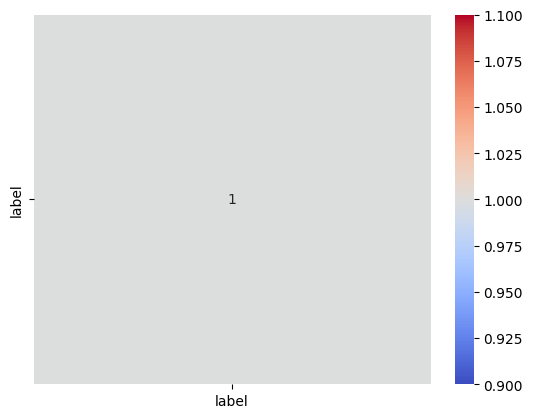

In [21]:
#feature selection
import seaborn as sns
vars_to_corr= ['content','label']


corr_matrix = data[vars_to_corr].corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [22]:
#splitting the data for training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [23]:
#training the model.  Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [24]:
X_train_pred = model.predict(X_train)
train_data_accuracy= accuracy_score(X_train_pred,Y_train)
print(train_data_accuracy)

0.9743389423076924


In [25]:
#checking accuracy on test set
X_test_pred = model.predict(X_test)
test_pred_accuracy= accuracy_score(X_test_pred,Y_test)
print(test_pred_accuracy)

0.9567307692307693


In [26]:
#making a predictive system
X_news= X_test[0]
pred= model.predict(X_news)
if(pred==0):
  print("real news")
else:
  print("fake news")

fake news


In [27]:
#make 9 other models and compare the accuracy of each model and with different datasets

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_pred)
print(dt_acc)

0.9348557692307692


In [30]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
print(rf_acc)

0.9302884615384616


In [31]:
# SVM
svm = SVC()
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_pred)
print(svm_acc)

0.9663461538461539


In [32]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, knn_pred)
print(knn_acc)

0.5766826923076923


In [ ]:
#Passive Aggressive classifier
from sklearn.linear_model import PassiveAggressiveClassifier

model=PassiveAggressiveClassifier(max_iter=500)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
pac_acc=accuracy_score(Y_test,y_pred)
print(pac_acc)

0.9629807692307693


In [33]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), Y, test_size=0.2, random_state=42)

In [35]:
# Neural Networks
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
nn_acc = accuracy_score(y_test, nn_pred)
print('Neural Networks accuracy:', nn_acc)

Neural Networks accuracy: 0.9605769230769231


In [ ]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print('XGBoost accuracy:', xgb_acc)

XGBoost accuracy: 0.9226519337016574


In [ ]:
# Bagging
bg = BaggingClassifier()
bg.fit(X_train, y_train)
bg_pred = bg.predict(X_test)
bg_acc = accuracy_score(y_test, bg_pred)
print('Bagging accuracy:', bg_acc)

Bagging accuracy: 0.8626677190213102


In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print('Naive Bayes accuracy:', nb_acc)

Naive Bayes accuracy: 0.8018942383583267


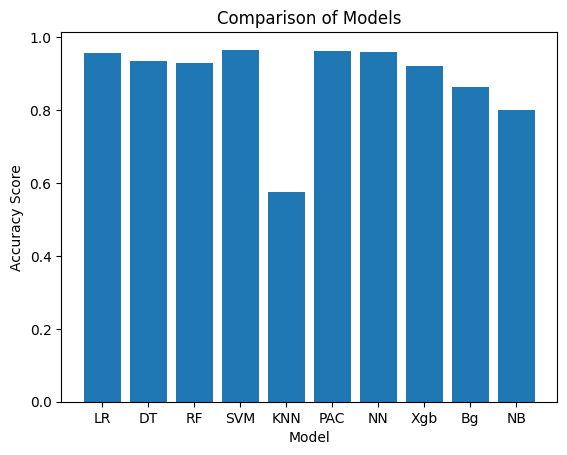

In [1]:
import matplotlib.pyplot as plt
# Create a dictionary of accuracy scores for each model
accuracy_scores = {'LR': test_pred_accuracy, 'DT': dt_acc, 'RF': rf_acc, 'SVM':svm_acc, 'KNN':knn_acc, 'PAC':pac_acc,'NN':nn_acc,'Xgb':xgb_acc,'Bg':bg_acc, 'NB':nb_acc}

# Create a bar chart of the accuracy scores
plt.bar(accuracy_scores.keys(), accuracy_scores.values())

# Add labels and title to the plot
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Models')

# Display the plot
plt.show()

<font size="4">From the above graph it can be noted that SVM has the largest accuracy=0.9663461538461539</font>

In [2]:
#statistical testing on the dataset
import numpy as np

In [7]:
import scipy.stats as stats

models = ['LR', 'DT', 'RF', 'SVM', 'KNN', 'PAC','NN', 'Xgb', 'Bg', 'NB']
scores = [test_pred_accuracy, dt_acc, rf_acc, svm_acc, knn_acc, pac_acc, nn_acc, xgb_acc, bg_acc, nb_acc]
scores = [np.array([score]) if np.ndim(score) == 0 else score for score in scores]

# Perform Friedman test
f_value, p_value = stats.friedmanchisquare(*scores)

# Print results
print("Friedman test")
print("--------------")
print("F-value: ", f_value)
print("p-value: ", p_value)

# Interpret results
if p_value < 0.05:
    print("There is a significant difference in the performance of the models.")
else:
    print("There is no significant difference in the performance of the models.")

Friedman test
--------------
F-value:  9.0
p-value:  0.43727418891386693
There is no significant difference in the performance of the models.


In [8]:
import numpy as np
from scipy.stats import chisquare

models = ['LR', 'DT', 'RF', 'SVM', 'KNN', 'PAC','NN', 'Xgb', 'Bg', 'NB']
scores = [test_pred_accuracy, dt_acc, rf_acc, svm_acc, knn_acc, pac_acc, nn_acc, xgb_acc, bg_acc, nb_acc]

expected_score = np.mean(scores)

# Calculate the chi-squared test statistic and p-value
chi_stat, p_value = chisquare(scores, f_exp=expected_score)

print("Chi-squared test results")
print("-------------------------")
print("Chi-squared statistic:", chi_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the test accuracy scores of the models.")
else:
    print("There is no significant difference in the test accuracy scores of the models.")

Chi-squared test results
-------------------------
Chi-squared statistic: 0.14861812055935486
p-value: 0.9999998505642951
There is no significant difference in the test accuracy scores of the models.


In [9]:
import numpy as np
from scipy.stats import ttest_rel

models = ['LR', 'DT', 'RF', 'SVM', 'KNN', 'PAC','NN', 'Xgb', 'Bg', 'NB']
scores = [test_pred_accuracy, dt_acc, rf_acc, svm_acc, knn_acc, pac_acc, nn_acc, xgb_acc, bg_acc, nb_acc]

# Perform the paired t-test
t_stat, p_value = ttest_rel(scores[:-1], scores[1:])

print("Paired t-test results")
print("----------------------")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the test accuracy scores of the models.")
else:
    print("There is no significant difference in the test accuracy scores of the models.")

Paired t-test results
----------------------
t-statistic: 0.2626416007722377
p-value: 0.799463825458402
There is no significant difference in the test accuracy scores of the models.
